# 패키지 로딩

In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, InputLayer, Flatten, Activation

import numpy as np
import matplotlib.pyplot as plt

# 하이퍼 파라미터 설정 

In [2]:
TOTAL_CLASS = 10
SAMPLE = 5
EPOCH = 10
BATCH = 200

# 데이터 로딩 및 확인 

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- Fashion MNIST Labels: https://keras.io/api/datasets/fashion_mnist

52421번째 샘플 데이터는 T-shirt/top이다.


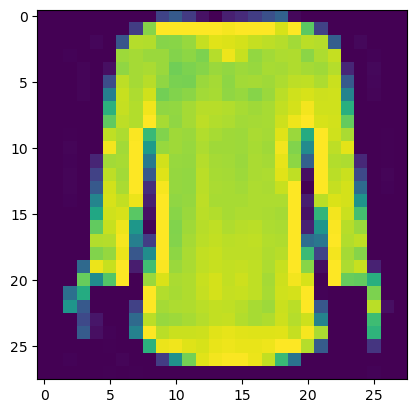

In [5]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
sample_no = np.random.randint(0, 60000)
sample = x_train[sample_no]
print(f'{sample_no}번째 샘플 데이터는 {labels[y_train[sample_no]]}이다.')
plt.imshow(sample)

In [6]:
unique, counts = np.unique(y_train, return_counts=True)
print('Label\tDescription\tCount')
print('-------------------------')
for i in range(TOTAL_CLASS):
    print(f'{unique[i]:^5d}\t{labels[i]:10s}\t{counts[i]:4d}')

Label	Description	Count
-------------------------
  0  	T-shirt/top	6000
  1  	Trouser   	6000
  2  	Pullover  	6000
  3  	Dress     	6000
  4  	Coat      	6000
  5  	Sandal    	6000
  6  	Shirt     	6000
  7  	Sneaker   	6000
  8  	Bag       	6000
  9  	Ankle boot	6000


# 데이터 스케일링

In [7]:
x_train = x_train / 255
x_test = x_test / 255

# 입력 데이터 모양 변경
- 가로 pixel X 세로 pixel X 채널 수

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

# 모델 생성

In [9]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(padding='same', pool_size=(2,2)))

# pooling 해서 축소된 데이터에 대해 한번 더 filter를 거침
model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(padding='same', pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(padding='same', pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(TOTAL_CLASS, activation='softmax'))

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,370 (294.41 KB)

 Trainable params: 75,370 (294.41 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 학습 및 저장
- 분류 모형의 손실 함수 종류
>- 타입/활성화 함수/손실 함수
>- 이진분류/sigmoid/'binary_crossentropy'
>- 다지분류(싱글 레이블-MNIST fashion item)/softmax/'sparse_categorical_crossentropy'
>- 다지분류(one-hot encoding 레이블)/softmax/'categorical_crossentropy'

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH, verbose=1)
model.save('fashion_item.h5')

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.6352 - loss: 1.0789
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8441 - loss: 0.4299
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8729 - loss: 0.3562
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8860 - loss: 0.3189
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8926 - loss: 0.3045
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8965 - loss: 0.2882
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9042 - loss: 0.2675
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9061 - loss: 0.2592
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9080 - loss: 0.2506
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9118 - loss: 0.2406


# 모델 평가

In [11]:
score = model.evaluate(x_test, y_test)
print(f'Loss:{score[0]:.3f}')
print(f'Accuracy:{score[1]:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8973 - loss: 0.2950
Loss:0.290
Accuracy:0.893


In [15]:
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(x_test)
print(y_pred_prob.shape)
y_hat = np.argmax(y_pred_prob, axis=1)
matrix = confusion_matrix(y_test, y_hat)
print(matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(10000, 10)
[[767   0  19  37   2   1 164   0   9   1]
 [  0 978   0  16   2   0   1   0   3   0]
 [ 11   1 857   5  28   0  95   0   3   0]
 [  9   6   9 925   9   0  40   0   2   0]
 [  0   0  84  44 716   0 155   0   1   0]
 [  0   0   0   0   0 948   0  40   0  12]
 [ 54   4  48  36  33   0 820   0   5   0]
 [  0   0   0   0   0   3   0 984   0  13]
 [  1   2   1   5   0   0   4   5 982   0]
 [  0   0   0   0   0   4   1  39   0 956]]


In [16]:
from sklearn.metrics import f1_score, roc_auc_score

f1_score = f1_score(y_test, y_hat, average='macro')
print(f'F1-Score:{f1_score:.3f}')
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'AUC:{auc:.3f}')

F1-Score:0.894
AUC:0.993


# 모델 예측

In [20]:
import warnings; warnings.filterwarnings('ignore')

In [21]:
import keras

loaded_model = keras.models.load_model('fashion_item.h5')
sample_no = np.random.randint(0,10000)
sample = x_test[sample_no]
sample = sample.reshape(1, 28, 28, 1)  # 가로x세로 28픽셀, 1 채널
pred = loaded_model.predict(sample)
print('샘플 데이터 패션 아이템:', labels[y_test[sample_no]])
print('샘플 데이터 예측 패션 아이템:', labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
샘플 데이터 패션 아이템: Sandal
샘플 데이터 예측 패션 아이템: Sandal
